### Distributions

In [2]:
%matplotlib inline

In [3]:
# imports
import pandas as pd
import numpy as np
import os

In [4]:
# set the path of the raw data (from par dirctory)
rawDataPath = os.path.join(os.path.pardir, 'data', 'raw')
testFilePath = os.path.join(rawDataPath, 'test.csv')
trainFilePath = os.path.join(rawDataPath, 'train.csv')

In [5]:
# get test and train dataframes
train_df = pd.read_csv(trainFilePath, index_col='PassengerId')
test_df = pd.read_csv(testFilePath, index_col='PassengerId')

In [6]:
test_df['Survived'] = -888 # Adding Survived with a default value

In [7]:
df = pd.concat((train_df, test_df), axis=0)

C:\Users\ELASVIN\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


#### UNIVARIATE Distribution

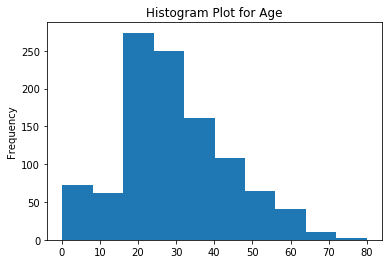

In [8]:
# use hist to create histogram
df.Age.plot(kind='hist', title = 'Histogram Plot for Age')

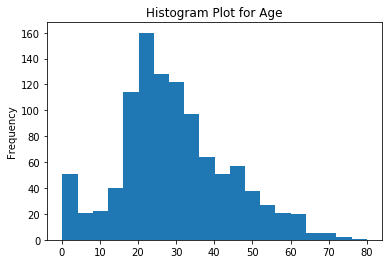

In [9]:
# use hist to create histogram
df.Age.plot(kind='hist', title = 'Histogram Plot for Age', bins=20)

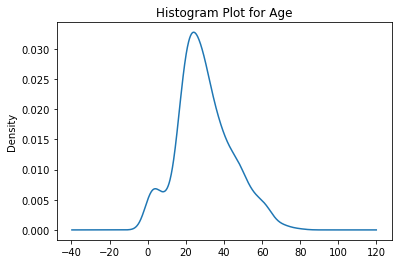

In [12]:
# use hist to create histogram
df.Age.plot(kind='kde', title = 'Histogram Plot for Age')

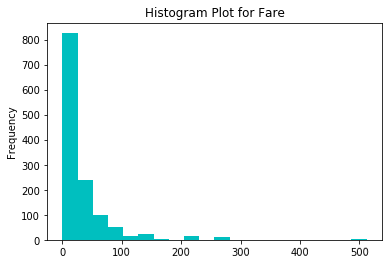

In [13]:
# histogram for fare
df.Fare.plot(kind='hist', rot=1, title='Histogram Plot for Fare', bins=20, color='c')

In [14]:
print('Skewness for Age : {0:.2f}'.format(df.Age.skew()))
print('Skewness for Fare : {0:.2f}'.format(df.Fare.skew()))

Skewness for Age : 0.41
Skewness for Fare : 4.37


#### BYVARIATE Distribution

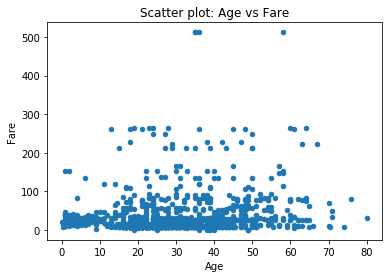

In [15]:
# Use scatter plot for bi-variate distribution
df.plot.scatter(x='Age', y='Fare', title = 'Scatter plot: Age vs Fare')

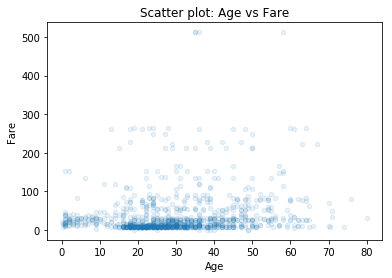

In [16]:
# Use alpha to set the transperency
df.plot.scatter(x='Age', y='Fare', title = 'Scatter plot: Age vs Fare', alpha=0.1)

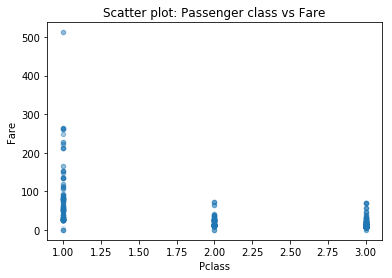

In [17]:
# Use alpha to set the transperency
df.plot.scatter(x='Pclass', y='Fare', title = 'Scatter plot: Passenger class vs Fare', alpha=0.15)

### Grouping

In [20]:
# group by
df.groupby('Sex').Age.median()

Sex
female    27.0
male      28.0
Name: Age, dtype: float64

In [22]:
df.groupby('Pclass').Fare.median()

Pclass
1    60.0000
2    15.0458
3     8.0500
Name: Fare, dtype: float64

In [23]:
df.groupby(['Pclass']).Age.median()

Pclass
1    39.0
2    29.0
3    24.0
Name: Age, dtype: float64

In [24]:
df.groupby(['Pclass']).Age.value_counts()

Pclass  Age  
1       36.00    12
        30.00    11
        35.00    11
        45.00    11
        24.00     9
        39.00     9
        48.00     9
        47.00     8
        50.00     8
        22.00     7
        27.00     7
        31.00     7
        33.00     7
        42.00     7
        49.00     7
        55.00     7
        18.00     6
        23.00     6
        38.00     6
        54.00     6
        58.00     6
        19.00     5
        21.00     5
        25.00     5
        28.00     5
        37.00     5
        40.00     5
        46.00     5
        60.00     5
        64.00     5
                 ..
3       18.50     2
        28.50     2
        30.50     2
        34.50     2
        48.00     2
        50.00     2
        0.17      1
        0.33      1
        0.42      1
        0.83      1
        11.50     1
        12.00     1
        20.50     1
        22.50     1
        23.50     1
        24.50     1
        26.50     1
        32.50     1
      

In [39]:
df.groupby(['Pclass'])['Fare', 'Age'].mean()

,Fare,Age
Pclass,,
1,87.508992,39.159930
2,21.179196,29.506705
3,13.302889,24.816367


In [40]:
var=df.groupby(['Pclass'])['Fare', 'Age']

In [58]:
var.mean()

,Fare,Age
Pclass,,
1,87.508992,39.159930
2,21.179196,29.506705
3,13.302889,24.816367


In [49]:
var.std()

,Fare,Age
Pclass,,
1,80.447178,14.548028
2,13.607122,13.638627
3,11.494358,11.958202


In [50]:
df.groupby(['Pclass']).agg({'Fare' : 'mean', 'Age' : 'median'})

,Fare,Age
Pclass,,
1,87.508992,39.0
2,21.179196,29.0
3,13.302889,24.0


In [51]:
# more complicated aggregations
aggregations = {
    'Fare' : {'mean_Fare' : 'mean',
              'median_Fare' : 'median',
              'max_Fare' : max,
              'min_Fare' : np.min},
    'Age' : {# work on the "Age" column
             'median_Age' : 'median',
             'min_Age' : min,
             'max_Age' : max,
             'range_Age' : lambda x: max(x) - min(x)}
}

In [52]:
df.groupby(['Pclass']).agg(aggregations)

C:\Users\ELASVIN\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\groupby\groupby.py:4656: FutureWarning: using a dict with renaming is deprecated and will be removed in a future version
  return super(DataFrameGroupBy, self).aggregate(arg, *args, **kwargs)


Fare                                       Age                  \
        mean_Fare median_Fare  max_Fare min_Fare median_Age min_Age max_Age   
Pclass                                                                        
1       87.508992     60.0000  512.3292      0.0       39.0    0.92    80.0   
2       21.179196     15.0458   73.5000      0.0       29.0    0.67    70.0   
3       13.302889      8.0500   69.5500      0.0       24.0    0.17    74.0   

                  
       range_Age  
Pclass            
1          79.08  
2          69.33  
3          73.83

In [53]:
df.groupby(['Pclass', 'Embarked']).Fare.median()

Pclass  Embarked
1       C           76.7292
        Q           90.0000
        S           52.0000
2       C           15.3146
        Q           12.3500
        S           15.3750
3       C            7.8958
        Q            7.7500
        S            8.0500
Name: Fare, dtype: float64

### Cross Tabs

In [54]:
# Cross tab on sex and Pclass
pd.crosstab(df.Sex, df.Pclass)

Pclass,1,2,3
Sex,,,
female,144,106,216
male,179,171,493


Pclass,1,2,3
Sex,,,
female,144,106,216
male,179,171,493


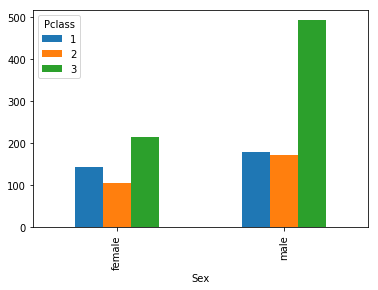

In [84]:
# Cross tab on sex and Pclass
pd.crosstab(df.Sex, df.Pclass).plot(kind='bar')
pd.crosstab(df.Sex, df.Pclass)

### Pivot Table

In [63]:
df.pivot_table(index="Sex", columns = 'Pclass', values='Age', aggfunc='median')

Pclass,1,2,3
Sex,,,
female,36.0,28.0,22.0
male,42.0,29.5,25.0


Pclass,1,2,3
Sex,,,
female,37.037594,27.499223,22.185329
male,41.029272,30.815380,25.962264


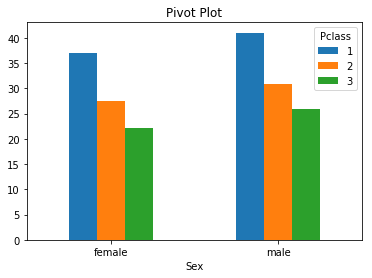

In [83]:
df.pivot_table(index="Sex", columns = 'Pclass', values='Age', aggfunc='mean').plot(kind='bar', rot=0, title='Pivot Plot')
df.pivot_table(index="Sex", columns = 'Pclass', values='Age', aggfunc='mean')

In [64]:
df.groupby(['Sex', 'Pclass']).Age.mean()

Sex     Pclass
female  1         37.037594
        2         27.499223
        3         22.185329
male    1         41.029272
        2         30.815380
        3         25.962264
Name: Age, dtype: float64

In [69]:
df.groupby(['Sex', 'Pclass', 'Parch', 'SibSp']).Age.mean().unstack()

SibSp                        0          1          2          3          4  \
Sex    Pclass Parch                                                          
female 1      0      36.416667  37.916667  55.666667        NaN        NaN   
              1      36.625000  45.333333        NaN        NaN        NaN   
              2      31.666667  20.800000  19.500000  25.000000        NaN   
              3            NaN  48.000000        NaN        NaN        NaN   
              4            NaN  60.000000        NaN        NaN        NaN   
       2      0      31.141026  29.944444        NaN  30.000000        NaN   
              1      26.000000  23.250000  15.000000        NaN        NaN   
              2      25.222222  17.880000        NaN        NaN        NaN   
              3      36.000000  54.000000  24.000000        NaN        NaN   
       3      0      24.093750  27.025000  20.000000  33.000000        NaN   
              1      16.625000  16.555556   2.166667   5.500000        NaN   
              2      23.400000  16.585000  15.000000   5.500000  12.571429   
              3      24.000000  48.000000        NaN        NaN        NaN   
              4      29.000000  45.000000        NaN        NaN        NaN   
              5      40.000000  38.500000        NaN        NaN        NaN   
              6            NaN  43.000000        NaN        NaN        NaN   
              9            NaN        NaN        NaN        NaN        NaN   
male   1      0      42.931250  39.571429  47.000000        NaN        NaN   
              1      37.000000  51.363636        NaN        NaN        NaN   
              2      22.400000  19.480000  13.000000  19.000000        NaN   
              3            NaN  61.000000        NaN        NaN        NaN   
              4            NaN  64.000000        NaN        NaN        NaN   
       2      0      32.626214  34.687500  24.600000        NaN        NaN   
              1      35.500000  20.100000  12.000000        NaN        NaN   
              2      11.582500  36.666667        NaN        NaN        NaN   
       3      0      28.486328  25.931818  26.250000  31.000000        NaN   
              1      20.178571  16.955882        NaN  12.333333   7.100000   
              2      20.366000  13.500000  18.000000   7.000000   6.800000   
              3            NaN  16.000000        NaN        NaN        NaN   
              4            NaN  40.000000        NaN        NaN        NaN   
              5            NaN  39.500000        NaN        NaN        NaN   
              6            NaN  40.000000        NaN        NaN        NaN   
              9            NaN        NaN        NaN        NaN        NaN   

SibSp                    5     8  
Sex    Pclass Parch               
female 1      0        NaN   NaN  
              1        NaN   NaN  
              2        NaN   NaN  
              3        NaN   NaN  
              4        NaN   NaN  
       2      0        NaN   NaN  
              1        NaN   NaN  
              2        NaN   NaN  
              3        NaN   NaN  
       3      0        NaN   NaN  
              1        NaN   NaN  
              2      13.00   NaN  
              3        NaN   NaN  
              4        NaN   NaN  
              5        NaN   NaN  
              6        NaN   NaN  
              9        NaN   NaN  
male   1      0        NaN   NaN  
              1        NaN   NaN  
              2        NaN   NaN  
              3        NaN   NaN  
              4        NaN   NaN  
       2      0        NaN   NaN  
              1        NaN   NaN  
              2        NaN   NaN  
       3      0        NaN   NaN  
              1        NaN   NaN  
              2       8.75  14.5  
              3        NaN   NaN  
              4        NaN   NaN  
              5        NaN   NaN  
              6        NaN   NaN  
              9        NaN   NaN

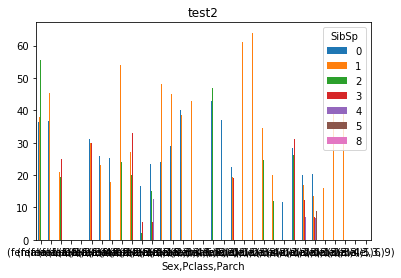

In [70]:
df.groupby(['Sex', 'Pclass', 'Parch', 'SibSp']).Age.mean().unstack().plot(kind='bar', rot=0, title='test2')

Pclass,1,2,3
Sex,,,
female,109.412385,23.234827,15.324250
male,69.888385,19.904946,12.415462


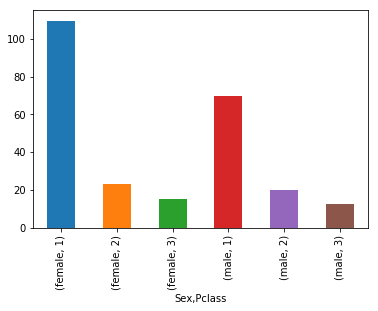

In [75]:
df.groupby(['Sex', 'Pclass']).Fare.mean().plot(kind='bar')
df.groupby(['Sex', 'Pclass']).Fare.mean().unstack()

Pclass
1    14.548028
2    13.638627
3    11.958202
Name: Age, dtype: float64

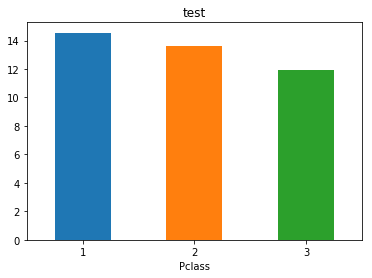

In [76]:
df.groupby(['Pclass']).Age.std().plot(kind='bar', rot=0, title='test')
df.groupby(['Pclass']).Age.std()

#### Some Rough Practice

In [77]:
df.Pclass.value_counts()

3    709
1    323
2    277
Name: Pclass, dtype: int64

In [78]:
df.groupby(['Pclass']).Age.value_counts()

Pclass  Age  
1       36.00    12
        30.00    11
        35.00    11
        45.00    11
        24.00     9
        39.00     9
        48.00     9
        47.00     8
        50.00     8
        22.00     7
        27.00     7
        31.00     7
        33.00     7
        42.00     7
        49.00     7
        55.00     7
        18.00     6
        23.00     6
        38.00     6
        54.00     6
        58.00     6
        19.00     5
        21.00     5
        25.00     5
        28.00     5
        37.00     5
        40.00     5
        46.00     5
        60.00     5
        64.00     5
                 ..
3       18.50     2
        28.50     2
        30.50     2
        34.50     2
        48.00     2
        50.00     2
        0.17      1
        0.33      1
        0.42      1
        0.83      1
        11.50     1
        12.00     1
        20.50     1
        22.50     1
        23.50     1
        24.50     1
        26.50     1
        32.50     1
      

In [79]:
df.groupby(['Sex', 'Pclass']).Age.mean()

Sex     Pclass
female  1         37.037594
        2         27.499223
        3         22.185329
male    1         41.029272
        2         30.815380
        3         25.962264
Name: Age, dtype: float64

## DATA Munging